In [3]:
%pylab inline

import numpy as np
from __future__ import division

import matplotlib.pyplot as plt
import seaborn as sns

import logging
logger = logging.getLogger()

Populating the interactive namespace from numpy and matplotlib


In [4]:
import cv2
cv2.__version__

'3.0.0'

In [5]:
img = cv2.imread('./res/CD_Fig_1-5_original_color.jpg')

In [6]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

In [7]:
logger.setLevel('DEBUG')

def BGR2CMYK(img_bgr):
    """convert image format from BGR to CMYK.
    
    ref: http://www.rapidtables.com/convert/color/rgb-to-cmyk.htm
    """
    logger.info('original imge shape: {}'.format(img_bgr.shape))
    img = img_bgr / 255
    logger.info('img dtype:{}'.format(img.dtype))
    b, g, r = cv2.split(img)
    logger.info('shape: r:{}, g:{}, b:{}'.format(r.shape, g.shape, b.shape))
    
    k = 1 - np.max(img, axis=2)
    logger.info('shape: k:{}, vim:{}, vmax{}'.format(k.shape, np.amax(k), np.amin(k)))
    
    c = (1-r-k) / (1-k)
    m = (1-g-k) / (1-k)
    y  = (1-b-k) / (1-k)
    logger.info('shape: c:{}, m:{}, y:{}'.format(c.shape, m.shape, y.shape))
    
    img_cmyk = cv2.merge((c, m, y, k))
    img_cmyk[np.isnan(img_cmyk)] = 0
    img_cmyk[np.isinf(img_cmyk)] = 1
    
    return img_cmyk

img_cmyk = BGR2CMYK(img)

INFO:root:original imge shape: (883, 922, 3)
INFO:root:img dtype:float64
INFO:root:shape: r:(883, 922), g:(883, 922), b:(883, 922)
INFO:root:shape: k:(883, 922), vim:1.0, vmax0.0
INFO:root:shape: c:(883, 922), m:(883, 922), y:(883, 922)


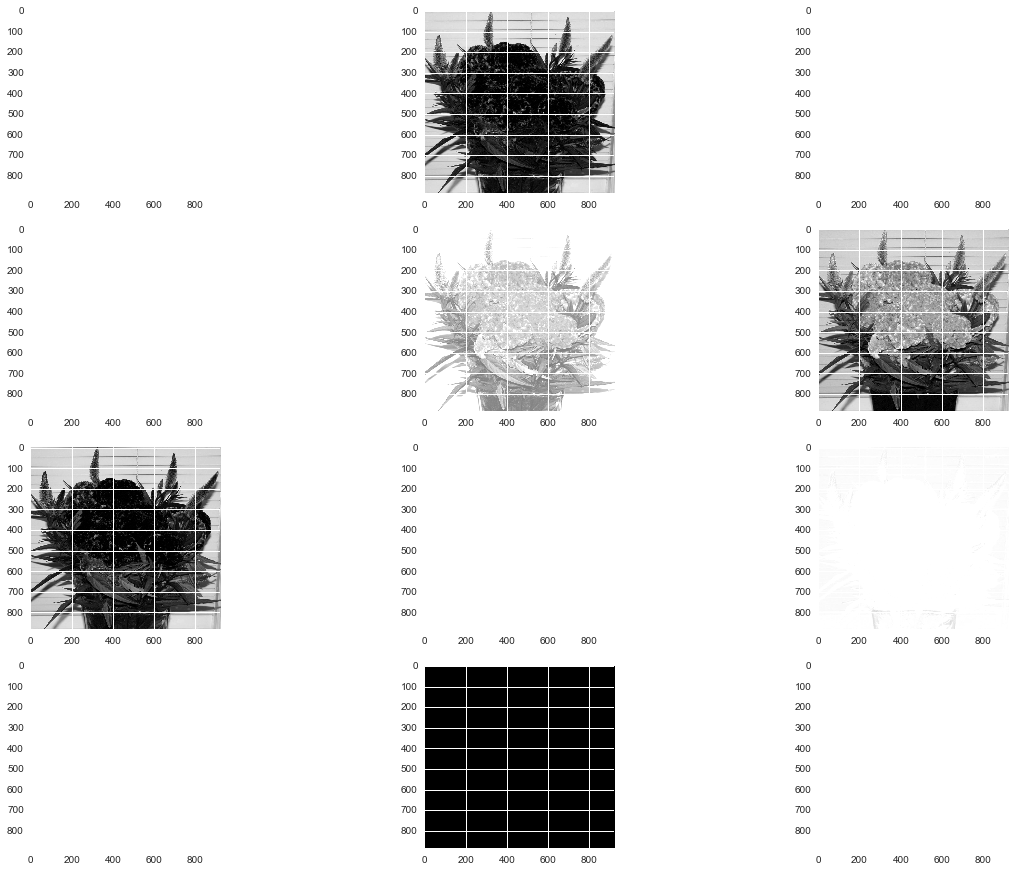

In [8]:
def fig_1_5_show(img_rgb, img_lab, img_cmyk):
    """Display all channels like fig 1.5."""        
    r, g, b = cv2.split(img_rgb)
    # http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html
    l_, a_, b_ = cv2.split(img_lab)
    c, m, y, k = cv2.split(img_cmyk)
        
    import matplotlib.pylab as pylab
    pylab.rcParams['figure.figsize'] = 4*5, 3*5  # that's default image size for this interactive session
    
    f, axarr = plt.subplots(4, 3)
    axarr[0, 0].imshow(c, cmap = plt.get_cmap('gray'), vmin = -1, vmax = 0)
    axarr[0, 1].imshow(b, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
    axarr[0, 2].imshow(k, cmap = plt.get_cmap('gray'), vmin = -1, vmax = 0)
    axarr[1, 0].imshow(a_, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 100)
    axarr[1, 1].imshow(l_, cmap = plt.get_cmap('gray'), vmin = -127, vmax = 127)
    axarr[1, 2].imshow(r, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
    axarr[2, 0].imshow(g, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
    axarr[2, 1].imshow(m, cmap = plt.get_cmap('gray'), vmin = -1, vmax = 0)
    axarr[2, 2].imshow(b_, cmap = plt.get_cmap('gray'), vmin = -127, vmax = 127)
    axarr[3, 0].imshow(y, cmap = plt.get_cmap('gray'), vmin = -1, vmax = 0)
    axarr[3, 1].imshow(np.zeros(c.shape), cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1)
    axarr[3, 2].imshow(np.ones(c.shape), cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1)
    

fig_1_5_show(img_rgb, img_lab, img_cmyk)